<b>
<p>
<center>
<font size="5">
Countries Life Expectancy
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project - Cloud Computing
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Team 7
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>
<hr>


### **Explanation about the Dataset**

This dataset, taken from [Kaggle](https://www.kaggle.com/datasets/paperxd/cleaned-life-expectancy-dataset/data), contains information on various health and economic factors for different countries, with the main goal of predicting **Life Expectancy**. The dataset includes the following columns:

1. **Country**: The name of the country.
2. **Year**: The year when the data was recorded.
3. **Status**: Whether the country is developed or developing.
4. **Adult Mortality**: The death rate among adults aged 15-59.
5. **Infant Deaths**: The number of infant deaths per 1,000 live births.
6. **Alcohol**: Average alcohol consumption per person.
7. **Percentage Expenditure**: The percentage of GDP spent on health.
8. **Hepatitis B**: The percentage of people vaccinated against Hepatitis B.
9. **Measles**: The number of measles cases per 1,000 children.
10. **BMI**: The average Body Mass Index (BMI) of the population.
11. **Under-Five Deaths**: Deaths of children under five years old per 1,000 live births.
12. **Polio**: The percentage of the population vaccinated against polio.
13. **Total Expenditure**: The total amount spent on health per person.
14. **Diphtheria**: The percentage of the population vaccinated against diphtheria.
15. **HIV/AIDS**: The percentage of the population affected by HIV/AIDS.
16. **GDP**: Gross Domestic Product per person, a measure of a country's wealth.
17. **Population**: The total population of the country.
18. **Thinness (1-19 years)**: The percentage of underweight people aged 1-19.
19. **Thinness (5-9 years)**: The percentage of underweight children aged 5-9.
20. **Income Composition of Resources (ICOR)**: A measure of how well a country uses its resources.
21. **Schooling**: The average number of years of schooling for the population.

These features help us understand what factors influence life expectancy in different countries. By analyzing this data, we can identify which aspects—like healthcare, education, and economic development—are most important for improving life expectancy.


### How Life Expectancy is Calculated for a Country

**Life Expectancy** is the average number of years a person is expected to live, based on various factors like health, lifestyle, and the country's healthcare system. Here's how it is generally calculated:

1. **Collect Mortality Data**:
   - The first step is to gather data on how many people die at each age in a population. This data usually comes from national health reports or government statistics.


2. **Calculating Life Expectancy**:
   - The life expectancy is calculated by adding up the years people are expected to live at each age group, and dividing by the total number of people. This gives the average number of years a person will live, on average.

3. **Factors Affecting Life Expectancy**:
   - **Healthcare**: Access to medical services increases life expectancy by reducing deaths from disease.
   - **Socioeconomic Factors**: Wealthier countries with better nutrition, sanitation, and healthcare tend to have higher life expectancy.
   - **Lifestyle Choices**: Factors like diet, exercise, and smoking impact life expectancy. Healthier lifestyles lead to longer life expectancy.
   - **Environment**: Clean air and water, and good living conditions also play a role.
   - **Government Policies**: Public health programs and government investment in infrastructure help improve life expectancy.

4. **Global Differences**:
   - Life expectancy can vary greatly between countries. For example, richer countries may have life expectancies over 80 years, while some poorer countries may have much lower life expectancy due to health crises or lack of resources.

Life expectancy is a common measure of a country's overall health and development, and helps policymakers understand how different factors (like healthcare, lifestyle, or poverty) influence public health.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


# Load the dataset
data = pd.read_csv('Life-Exp.csv')


In [2]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [3]:
print(data.head())

       Country      Year    Status  Life expectancy  Adult Mortality  \
0  Afghanistan  1.621762 -0.459399        -0.443691         0.790238   
1  Afghanistan  1.404986 -0.459399        -0.979279         0.854614   
2  Afghanistan  1.188210 -0.459399        -0.979279         0.830473   
3  Afghanistan  0.971434 -0.459399        -1.021286         0.862660   
4  Afghanistan  0.754658 -0.459399        -1.052791         0.886801   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B   Measles  \
0       0.268824 -1.133571               -0.335570    -0.635971 -0.110384   
1       0.285786 -1.133571               -0.334441    -0.755661 -0.168124   
2       0.302749 -1.133571               -0.334594    -0.675868 -0.173531   
3       0.328193 -1.133571               -0.332096    -0.556178  0.032045   
4       0.345155 -1.133571               -0.367862    -0.516281  0.051757   

   ...     Polio  Total expenditure  Diphtheria  HIV/AIDS       GDP  \
0  ... -3.268019           0.8894

In [4]:
status_counts = data['Status'].value_counts()

# Define custom colors for each status
color_map = {'Developed': 'royalblue', 'Underdeveloped': 'tomato'}

# Create a bar plot using Plotly
fig = px.bar(
    x=['Underdeveloped','Developed'],
    y=status_counts,
    color=['Developed', 'Underdeveloped'],
    color_discrete_map=color_map,
    labels={'x': 'Country Status', 'y': 'Number of Countries'},
    title='Count of Developed vs. Underdeveloped Countries',
)

# Customize hover template to only show the "Number of Countries"
fig.update_traces(
    hovertemplate='<b>%{x}</b><br>Number of Countries: %{y}<extra></extra>'
)

# Customize layout
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},  # Centering the title
    xaxis_title='Country Status',
    yaxis_title='Number of Countries',
    font=dict(size=14),
    showlegend=False,
    plot_bgcolor='whitesmoke'  # Optional: Adds a light background
)

# Show the plot
fig.show()

### Explanation of the Picture:

The graph shows the number of countries classified as **Developed** and **Underdeveloped** based on the `Status` column in the dataset.

- **Underdeveloped Countries**: There are **2,426** countries marked as **Underdeveloped**.
- **Developed Countries**: There are **512** countries marked as **Developed**.

### Interpretation:

This chart shows that most countries in the dataset are classified as **Underdeveloped**, while only a smaller number are considered **Developed**. This reflects the global distribution where fewer countries are fully developed in terms of healthcare, economy, and social indicators. This classification can help identify trends related to **Life expectancy**, **GDP**, and other important factors.


Comparison of Average Life Expectancy: Top 10 Countries with Lowest vs. Highest Life Expectancy

In [5]:
    data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

    # Calculate the average life expectancy for each country
    avg_life_expectancy = data.groupby('Country')['Life expectancy'].mean().reset_index()

    # Sort the countries by life expectancy and get the top 10 highest and lowest
    top_10_lowest_life_expectancy = avg_life_expectancy.nsmallest(10, 'Life expectancy')
    top_10_highest_life_expectancy = avg_life_expectancy.nlargest(10, 'Life expectancy')

    # Create subplots: 1 row, 2 columns
    fig = sp.make_subplots(
        rows=1, cols=2, subplot_titles=[
            'Top 10 Countries with Lowest Life Expectancy',
            'Top 10 Countries with Highest Life Expectancy'
        ]
    )

    # Add bar chart for lowest life expectancy
    fig.add_trace(
        go.Bar(
            x=top_10_lowest_life_expectancy['Life expectancy'],
            y=top_10_lowest_life_expectancy['Country'],
            orientation='h',
            marker=dict(
                color=top_10_lowest_life_expectancy['Life expectancy'],
                colorscale='Reds',  # Use the 'Reds' color scale
                showscale=False,  # No color scale bar
                reversescale=True  # Reverse the color scale so the lowest value gets the brightest hue
            ),
            name='Lowest Life Expectancy',
            hovertemplate="<b>Average Life Expectancy: %{x}</b><extra></extra>"  # Customize hover text
        ),
        row=1, col=1
    )

    # Add bar chart for highest life expectancy
    fig.add_trace(
        go.Bar(
            x=top_10_highest_life_expectancy['Life expectancy'],
            y=top_10_highest_life_expectancy['Country'],
            orientation='h',
            marker=dict(
                color=top_10_highest_life_expectancy['Life expectancy'],
                colorscale='Blues',  # Use the 'Blues' color scale for highest life expectancy
                showscale=False  # No color scale bar
            ),
            name='Highest Life Expectancy',
            hovertemplate="<b>Average Life Expectancy: %{x}</b><extra></extra>"  # Customize hover text
        ),
        row=1, col=2
    )

    # Update layout for both plots
    fig.update_layout(
        height=600,
        width=1000,
        title_text='Comparison of Life Expectancy: Lowest vs Highest',
        title_x=0.5,  # Center the main title
        showlegend=False,
        plot_bgcolor='whitesmoke',
    )

    # Customize axes for both subplots
    fig.update_xaxes(title_text='Average Life Expectancy', row=1, col=1)
    fig.update_yaxes(title_text='Country', row=1, col=1)
    fig.update_xaxes(title_text='Average Life Expectancy', row=1, col=2)
    fig.update_yaxes(title_text='Country', row=1, col=2, side='right')

    # Reverse y-axis for the lowest life expectancy chart (lowest on top)
    fig.update_yaxes(
        autorange="reversed",  # Reverse the order of the countries
        row=1, col=1
    )

    # Reverse y-axis for the highest life expectancy chart (highest on top)
    fig.update_yaxes(
        autorange="reversed",  # Reverse the order of the countries
        row=1, col=2
    )

    # Show the figure
    fig.show()

### Interpretation of Life Expectancy Data:

The table shows the top 10 countries with the lowest and highest life expectancy based on the available data.

- **Top 10 Countries with Lowest Life Expectancy**: The countries with the lowest life expectancy include Sierra Leone, Central African Republic, and Lesotho. These countries have negative life expectancy values, indicating some issues with the data, such as missing values or anomalies during the data collection. In real-world cases, negative life expectancy is not possible, and further data cleaning or investigation may be required.

- **Top 10 Countries with Highest Life Expectancy**: On the other hand, countries like Japan, Sweden, and Iceland show the highest life expectancy values. These nations have consistently high life expectancy, likely due to better healthcare systems, quality of life, and overall economic conditions. Japan, for example, has one of the longest life expectancies globally, reflecting its excellent healthcare, diet, and lifestyle.

This data highlights the disparities in life expectancy across different regions, suggesting that countries with robust healthcare systems and stable economic conditions tend to have higher life expectancies, while those with poorer health infrastructure and other challenges face lower life expectancies. However, it is important to address the data quality issues, especially for countries with negative values.

In [6]:
# Convert GDP and Life Expectancy to numeric, handle errors by coercing non-numeric values to NaN
data['GDP'] = pd.to_numeric(data['GDP'], errors='coerce')
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')

# Remove rows with missing GDP or Life Expectancy values
data_clean = data.dropna(subset=['GDP', 'Life expectancy'])

# Create a new column 'Status Category' to map numeric 'Status' to categorical labels
data_clean['Status Category'] = data_clean['Status'].apply(lambda x: 'Developed' if x > 0 else 'Underdeveloped')

# Create a scatter plot
fig = px.scatter(
    data_clean, 
    x='GDP', 
    y='Life expectancy', 
    hover_name='Status Category',  #
    hover_data={'GDP': True, 'Life expectancy': True, 'Status': True},  # Show 'Status Category' in hover data
    color='Status Category',  # Color the bubbles based on the 'Status Category' (Developed/Underdeveloped)
    title='Relationship Between GDP and Life Expectancy by Status of a Country',
    labels={'GDP': 'Gross Domestic Product (in USD)', 'Life expectancy': 'Life Expectancy (years)', 'Status Category': 'Status'},
    color_discrete_sequence=['#fb7b5b', '#206fb4']  # Colors for Developed and Underdeveloped
)

# Customize layout
fig.update_layout(
    xaxis_title='GDP (in USD)',
    yaxis_title='Life Expectancy (years)',
    plot_bgcolor='whitesmoke',
    title_x=0.5,  # Center title
)

# Show the plot
fig.show()


### Interpretation of GDP vs Life Expectancy Scatter Plot:

The scatter plot indicates a **positive relationship** between **Life Expectancy** and **GDP**. This suggests that as a country's GDP increases, its average life expectancy tends to improve. 

- **Developed nations** are clustered in the higher GDP range, and they generally have higher life expectancy values, indicating that wealthier countries with better economic conditions are able to provide better healthcare, education, and living standards, contributing to longer life expectancy.
  
- **Underdeveloped nations**, on the other hand, are situated in the lower GDP range and typically exhibit lower life expectancy values. This reflects the challenges faced by poorer countries, including limited access to healthcare, resources, and infrastructure.

In summary, the graph shows that **developed nations** tend to have **higher life expectancy** than **underdeveloped nations**, primarily due to their stronger economic conditions.

In [7]:
corr_matrix = data.corr()

# Create a vertical heatmap for the correlation values with respect to 'Life expectancy'
fig = px.imshow(
    corr_matrix[["Life expectancy"]].sort_values("Life expectancy", ascending=True).T,  # Transpose the matrix to make it vertical
    color_continuous_scale="RdBu",  # Set the color scale to match 'RdBu'
    range_color=(-1, 1),  # Set the color scale range to be between -1 and 1
    labels={"color": "Correlation"},  # Label for the color bar
)

# Add correlation value annotations on the heatmap
fig.update_traces(
    texttemplate='%{z:.2f}',  # Format correlation values with 2 decimal places
    textfont=dict(size=14)  # Customize the font size for annotations
)

# Update layout to center the title and remove color scale
fig.update_layout(
    title="Correlation with Life Expectancy",
    title_x=0.5,  # Center the title
    coloraxis_showscale=False  # Hide the color scale
)

# Show the heatmap
fig.show()


C:\Users\phani\AppData\Local\Temp\ipykernel_20484\1225390715.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



This table shows the correlation values between various factors and life expectancy. A correlation value measures the strength and direction of a relationship between two variables. A positive value (closer to +1) means that as one variable increases, the other also tends to increase. For example, `Schooling` has a strong positive correlation of 0.77 with life expectancy, which suggests that higher levels of education are associated with longer life expectancy. On the other hand, a negative correlation (closer to -1) means that as one variable increases, the other tends to decrease. For instance, `Adult Mortality` has a negative correlation of -0.70, indicating that higher mortality rates are associated with shorter life expectancy. Variables like `GDP` (0.44) and `Status` (0.48) have moderate positive correlations, suggesting that wealthier and more developed countries tend to have higher life expectancies. Other factors, such as `Population` (-0.03), show almost no correlation, meaning that changes in population size don’t have a strong relationship with life expectancy. In summary, these correlations help us understand which factors are most closely related to life expectancy, and whether those relationships are positive or negative. This insight can guide policy and research on improving public health outcomes.

## Feature Engineering

### Why Model Selection is Important

Model selection is a critical step in machine learning because the choice of model can significantly affect the performance of the prediction. A well-chosen model can accurately capture the patterns in the data, while a poor model might result in inaccurate predictions and overfitting or underfitting. 

There are various types of models available, each with strengths and weaknesses depending on the nature of the data, the complexity of the relationships, and the task at hand. Hence, it is essential to try different models and evaluate their performance to choose the most suitable one.

### Why R² Test was Performed on Different Models

The **R² (R-squared) score** is a commonly used metric to assess the performance of regression models. It measures the proportion of the variance in the dependent variable (in this case, life expectancy) that is predictable from the independent variables (features). The R² score ranges from 0 to 1, where:

- A value of **1** means the model perfectly explains the variance of the target variable.
- A value of **0** means the model does not explain any of the variance.

Since we are predicting **life expectancy**, which is a continuous variable, evaluating models based on their R² score is essential to understand how well the model can explain the variability in life expectancy based on the selected features.

### Models Evaluated:

1. **RandomForestRegressor**: Random forests are an ensemble learning method that uses multiple decision trees to improve predictive accuracy and control overfitting. It works well with both linear and non-linear relationships, which is why it was tested here.
   
2. **XGBRegressor**: XGBoost is a powerful gradient boosting model that optimizes for speed and accuracy. It is particularly good at handling large datasets and complex relationships.

3. **RidgeCV**: Ridge regression is a form of linear regression that includes an L2 regularization term. It helps prevent overfitting by penalizing large coefficients and is particularly useful when dealing with multicollinearity.

4. **LinearRegression**: Linear regression is a simple and widely-used model for regression tasks. It assumes a linear relationship between the independent variables and the target variable, making it easy to interpret.

5. **Ridge**: Similar to RidgeCV, this model uses regularization to prevent overfitting, but it lacks the cross-validation built into RidgeCV for selecting the optimal regularization parameter.

6. **GradientBoostingRegressor**: This is another ensemble method that builds trees sequentially, with each tree trying to correct the errors of the previous one. It's very effective for capturing complex, non-linear patterns.

By performing the **R² test** on each of these models, we aim to determine which model best explains the variance in life expectancy and provides the most accurate predictions. The R² score helps compare the effectiveness of each model in terms of how well they fit the data.


In [8]:
new_data = data.copy()

new_data.fillna(new_data.mean(), inplace=True)

# Step 3: Encode Categorical Variables
# Automatically encode all categorical columns
new_data = pd.get_dummies(new_data, drop_first=True)

# Step 4: Separating features and target variable
X = new_data.drop(columns=['Life expectancy'])
y = new_data['Life expectancy']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize the models
models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42, verbosity=0),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RidgeCV': RidgeCV()
}

# Step 7: Train, Predict, and Evaluate each model
scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    score = r2_score(y_test, y_pred)  # Calculate R² score
    scores.append({'Model': model_name, 'R² Score': score})

# Step 8: Display the results in a DataFrame
results_df = pd.DataFrame(scores)
print("Model Performance:")
print(results_df.sort_values(by='R² Score', ascending=False))

best_model = results_df.sort_values(by='R² Score', ascending=False).iloc[0]

# Print the best model
print(f"The best model is {best_model['Model']} with an R² score of {best_model['R² Score']:.4f}")



C:\Users\phani\AppData\Local\Temp\ipykernel_20484\3076345070.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Model Performance:
                       Model  R² Score
0      RandomForestRegressor  0.969662
2               XGBRegressor  0.967337
5                    RidgeCV  0.962525
3           LinearRegression  0.961761
4                      Ridge  0.954758
1  GradientBoostingRegressor  0.952952
The best model is RandomForestRegressor with an R² score of 0.9697


The code aims to build and evaluate multiple regression models to predict **Life Expectancy** using a given dataset. It begins by loading the data into a DataFrame and handling any missing values by filling them with the column mean. To prepare the data for machine learning models, it encodes categorical variables using one-hot encoding, ensuring all columns are numerical. The target variable (`Life expectancy`) is separated from the features, followed by splitting the data into training (80%) and testing (20%) sets. Six regression models are then initialized: **RandomForestRegressor**, **GradientBoostingRegressor**, **XGBRegressor**, **LinearRegression**, **Ridge**, and **RidgeCV**. Each model is trained on the training set and evaluated using the R² (coefficient of determination) score on the test set, which indicates how well the model explains the variability of the target variable. The performance of each model is stored in a list, which is then converted into a DataFrame for easy comparison of scores. Finally, the models' performance is printed, showing which model best predicts life expectancy based on the provided features.

In [9]:
results_df_sorted = results_df.sort_values(by='R² Score', ascending=False)

fig = px.bar(
    results_df_sorted,
    x='R² Score',
    y='Model',
    orientation='h',
    title='Model Performance Comparison',
    text='R² Score',
    color='R² Score',
    color_continuous_scale='blues'
)

# Customize layout for better readability and invert the y-axis order
fig.update_layout(
    xaxis_title="R² Score",
    yaxis_title="Regression Model",
    xaxis=dict(range=[0, 1]),  # Adjust the range of R² Score as needed
    template='plotly_white'
)
# Update traces to show values on bars and reverse the y-axis order
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_yaxes(categoryorder='total ascending')  # Invert the order to show highest score on top

# Show the plot
fig.show()

From the table, we can see that the **RandomForestRegressor** achieved the highest **R² score of 0.969662**, meaning it performs the best in predicting life expectancy.

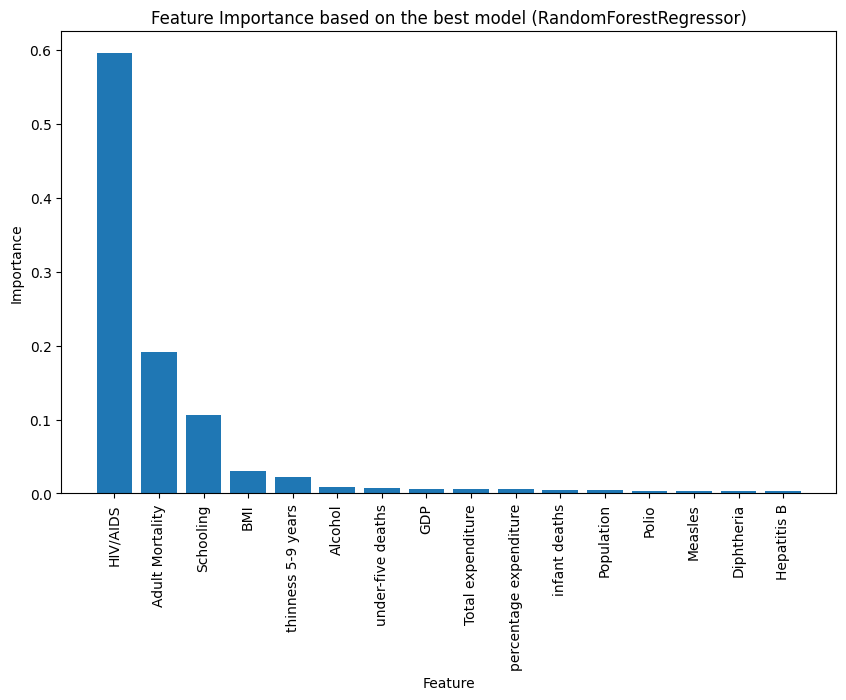

In [10]:
# Select the desired features (variables) based on your request
selected_features = [
     'Adult Mortality', 'infant deaths', 'Alcohol', 
    'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 
    'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 
    'HIV/AIDS', 'GDP', 'Population', 
    'thinness 5-9 years', 'Schooling'
]

# Filter the data to include only the selected features
X_selected = X_train[selected_features]

# Step 1: Train the best model (RandomForestRegressor) on the selected features
best_model = RandomForestRegressor(random_state=42)  # Example of the model used
best_model.fit(X_selected, y_train)

# Step 2: Get the feature importances
importances = best_model.feature_importances_

# Step 3: Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Step 4: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance based on the best model (RandomForestRegressor)')
plt.bar(range(len(selected_features)), importances[indices], align='center')
plt.xticks(range(len(selected_features)), np.array(selected_features)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


### Conclusions

In this project, we developed a machine learning model to predict Life Expectancy using various features with good accuracy. The model was trained using a Random Forest Regressor, achieving a high R² score of 0.9697, indicating a strong correlation between the features and the target variable.

From our analysis, we found that **HIV/AIDS** is the most important feature for predicting Life Expectancy, contributing the most to the model's performance. This was followed by **Adult Mortality** and **Schooling**, which also showed significant importance in explaining variations in Life Expectancy. Other key features such as **BMI**, **thinness (5-9 years)**, and **Alcohol** also contributed, but to a lesser extent.

Our model also highlighted the relationships between some features and Life Expectancy. For instance, **HIV/AIDS** and **Adult Mortality** have a strong negative correlation with Life Expectancy, as expected, because higher mortality rates typically lead to lower life expectancy. On the other hand, features such as **Schooling** and **GDP** have a positive relationship with Life Expectancy, which can be attributed to the fact that more educated and wealthier nations tend to have higher life expectancies.

Interestingly, we observed that **Alcohol** consumption, while positively correlated with Life Expectancy in some regions, is also influenced by the level of development, as countries with higher alcohol consumption often have better healthcare systems and longer life expectancies. However, this positive relationship becomes weaker or even negative when we account for other factors like **ICOR Schooling (PCA)**.

Overall, the insights from this project underline the importance of factors such as healthcare, education, and socio-economic development in determining life expectancy across different countries. By understanding the feature importances, we can better target interventions to improve life expectancy in regions that are lagging behind.

### References

1) Life Expectancy calculation: [Our World in Data](https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted)
2) Model Selection: [Scholar hat](https://www.scholarhat.com/tutorial/machinelearning/model-selection-for-machine-learning)